# Проект по теме "Машинное обучение"

### Содержание

1. [Описание проекта, цели и план работы](#start)
2. [Загрузка данных](#load)
3. [Исследовательский анализ данных (EDA)](#EDA)
4. [Построение модели прогнозирования оттока клиентов](#building)
5. [Кластеризация клиентов](#clustering)
6. [Выводы](#conclusion)
7. [Базовые рекомендации](#recommendation)

<a id="start"></a>

### Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 

### Цель проекта

Провести анализ и подготовить план действий по удержанию клиентов.

А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    * выделить целевые группы клиентов;
    * предложить меры по снижению оттока;
    * определить другие особенности взаимодействия с клиентами.

### План работы

* Откроем файл с данными и изучим общую информацию
* Подготовим данные
* Проведем исследовательский анализ данных (EDA)
* Построим модель прогнозирования оттока клиентов
* Сделаем кластеризацию клиентов
* Напишем выводы и рекомендации

<a id="load"></a>

## Шаг 1. Загрузим данные.

Загрузим библиотеки

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Загрузим файл и прочитаем

In [2]:
pth1 = 'D:/datasets/gym_churn.csv'
pth2 = '/datasets/gym_churn.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Файл не найден :-(')
    
data.head() 

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


#### Описание данных

«Культурист-датасаентист» предоставил сведения в csv-файлах.

Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
* Данные клиента за предыдущий до проверки факта оттока месяц:
    * 'gender' — пол;
    * 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
    * 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    * Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    * 'Phone' — наличие контактного телефона;
    * 'Age' — возраст;
    * 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
    

* Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    * 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    * 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    * 'Group_visits' — факт посещения групповых занятий;
    * 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    * 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    * 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
    * 'Churn' — факт оттока в текущем месяце.

 Проверим данные на нулевые значения

In [3]:
round((data.isnull().mean()*100),2)

gender                               0.0
Near_Location                        0.0
Partner                              0.0
Promo_friends                        0.0
Phone                                0.0
Contract_period                      0.0
Group_visits                         0.0
Age                                  0.0
Avg_additional_charges_total         0.0
Month_to_end_contract                0.0
Lifetime                             0.0
Avg_class_frequency_total            0.0
Avg_class_frequency_current_month    0.0
Churn                                0.0
dtype: float64

 Проверим данные на пропуски.

In [4]:
round((data.isna().mean()*100),2)

gender                               0.0
Near_Location                        0.0
Partner                              0.0
Promo_friends                        0.0
Phone                                0.0
Contract_period                      0.0
Group_visits                         0.0
Age                                  0.0
Avg_additional_charges_total         0.0
Month_to_end_contract                0.0
Lifetime                             0.0
Avg_class_frequency_total            0.0
Avg_class_frequency_current_month    0.0
Churn                                0.0
dtype: float64

Проверим на дубликаты.

In [5]:
data.duplicated().sum()

0

Переведём название столбцов в нижний регистр.

In [6]:
data.columns = data.columns.str.lower()

Посмотрим на типы данных и статистику.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Переведем столбец `'month_to_end_contract'` к целочисленному значению.

In [8]:
data['month_to_end_contract'] = data['month_to_end_contract'].astype('int64')

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


#### Промежуточный вывод

Данные содержат 4000 строк и 14 столбцов. В них отсутствуют пропуски, нули и дубликаты.
Типы данных - целые и вещественные числа. В столбцах 'gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits' и 'churn' собержатся категориальные данные. Они представлены в числовыми значениями 0 и 1.

Изучив статистику можно выделить следующее: средний возраст клиентов 29,2 года, от 18 до 41 года, с распределением по гендорному призныку почти 50/50.
Большая часть - 
84,5% клиентов проживание или работа в районе, где находится фитнес-центр, 
48,7% являются сотрудником компании-партнёра клуба,
30,9% участники акции «приведи друга»,
41,2% посещеют групповые занятия.
Средняя длительность текущего действующего абонемента 4,68 месяца, медиана - 1 месяц.

<a id="EDA"></a>

## Шаг2. Проведем исследовательский анализ данных (EDA)

#### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

Разделим на два df и посмотрим.

In [10]:
churn = data.query('churn == 1')
print('Данные по клиентам, которые попали в отток')
display(churn.describe().T)
remain = data.query('churn == 0')
print()
print('Данные по оставшимся клиентам')
display(remain.describe().T)

Данные по клиентам, которые попали в отток


,count,mean,std,min,25%,50%,75%,max
gender,1061.0,0.510839,0.500118,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,1061.0,0.768143,0.422217,0.000000,1.000000,1.000000,1.000000,1.000000
partner,1061.0,0.355325,0.478837,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,1061.0,0.183789,0.387495,0.000000,0.000000,0.000000,0.000000,1.000000
phone,1061.0,0.902922,0.296204,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,1061.0,1.728558,2.132371,1.000000,1.000000,1.000000,1.000000,12.000000
group_visits,1061.0,0.268615,0.443448,0.000000,0.000000,0.000000,1.000000,1.000000
age,1061.0,26.989632,2.895163,18.000000,25.000000,27.000000,29.000000,38.000000
avg_additional_charges_total,1061.0,115.082899,77.696419,0.148205,50.629127,103.814686,165.616858,425.535220
month_to_end_contract,1061.0,1.662582,1.964593,1.000000,1.000000,1.000000,1.000000,12.000000



Данные по оставшимся клиентам


,count,mean,std,min,25%,50%,75%,max
gender,2939.0,0.510037,0.499984,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,2939.0,0.873086,0.332933,0.000000,1.000000,1.000000,1.000000,1.000000
partner,2939.0,0.534195,0.498914,0.000000,0.000000,1.000000,1.000000,1.000000
promo_friends,2939.0,0.353522,0.478144,0.000000,0.000000,0.000000,1.000000,1.000000
phone,2939.0,0.903709,0.295040,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,2939.0,5.747193,4.716942,1.000000,1.000000,6.000000,12.000000,12.000000
group_visits,2939.0,0.464103,0.498795,0.000000,0.000000,0.000000,1.000000,1.000000
age,2939.0,29.976523,3.009933,19.000000,28.000000,30.000000,32.000000,41.000000
avg_additional_charges_total,2939.0,158.445715,99.801599,0.171862,76.920993,149.881171,224.448274,552.590740
month_to_end_contract,2939.0,5.283089,4.363522,1.000000,1.000000,6.000000,10.000000,12.000000


Средние значения для клиентов попавших в отток:
* lifetime              1 месяц
* contract_period       1.7 месяца
* month_to_end_contract 1.6 месяца
* age                   27 лет

Средние значения для оставшегося клиента:

* lifetime              5 месяцев
* contract_period       5.7 месяца
* month_to_end_contract 5.2 месяца
* age                   30 лет

Различия очевидны.

#### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

Построим столбчатые гистограммы для количественных признаков.

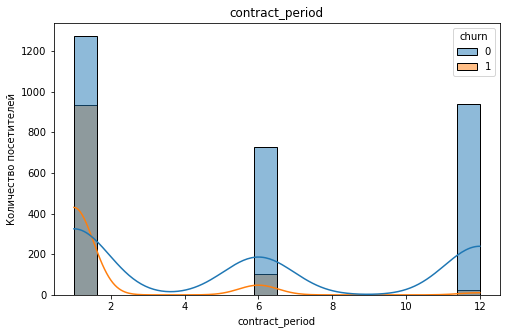

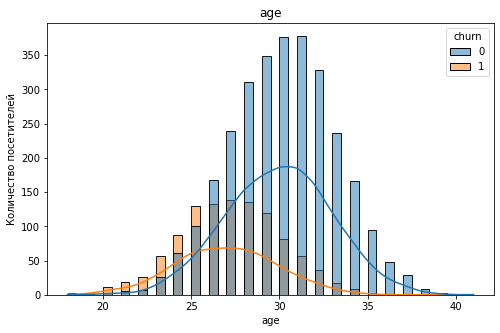

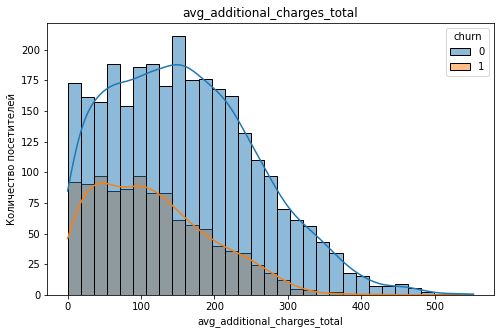

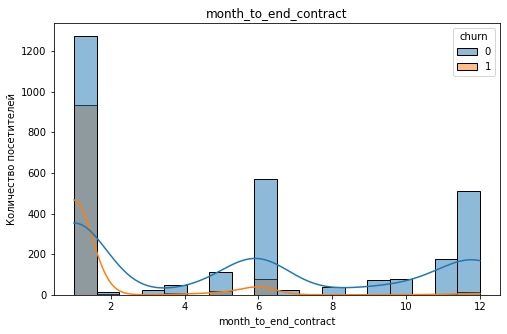

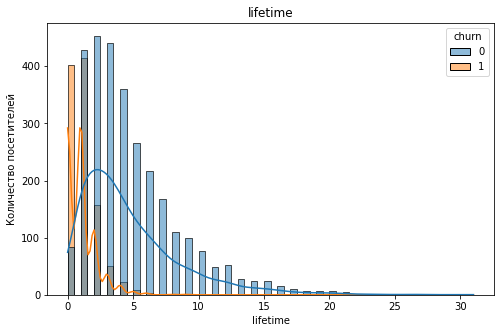

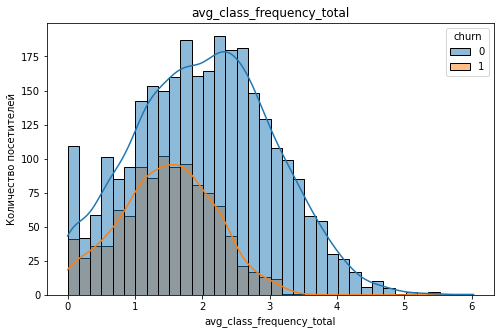

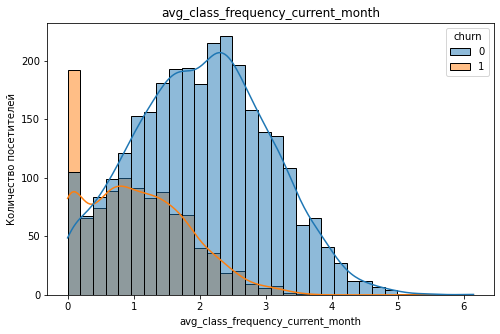

In [11]:
for col in data.drop(['churn', 'gender', 'near_location', 'partner', 
                      'promo_friends', 'phone', 'group_visits'], 
                    axis = 1).columns:
    
    plt.figure(figsize=(8,5))
    sns.histplot(data=data, x=col, hue="churn", kde=True)
    plt.title(col)
    plt.ylabel('Количество посетителей')
    plt.show(); 

Построим столбчатые гистограммы для категориальных признаков.

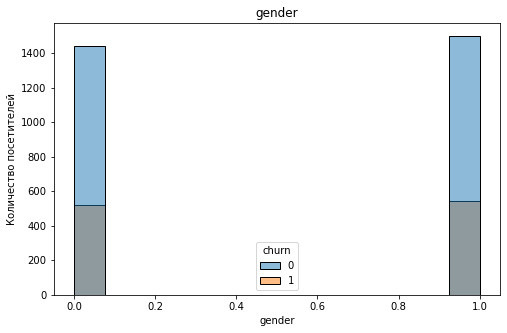

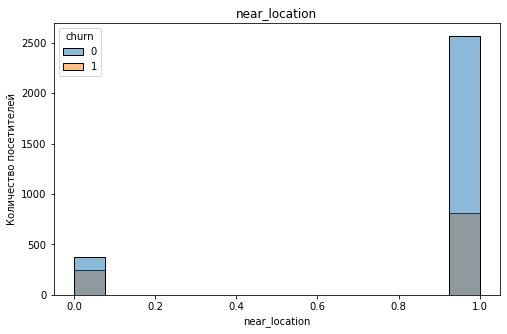

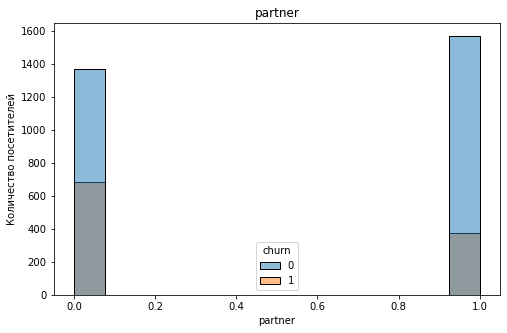

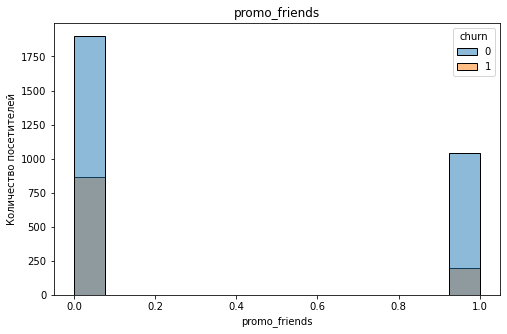

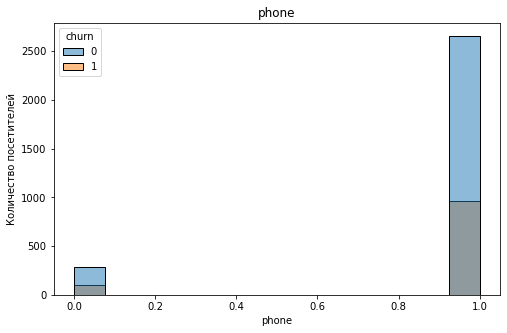

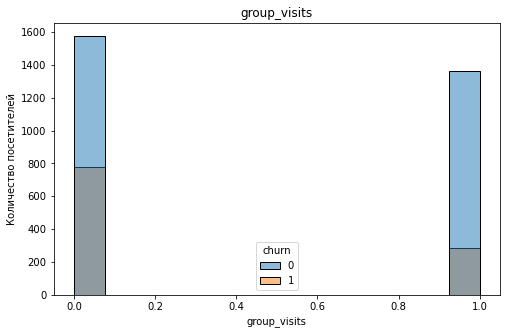

In [12]:
for col in ['gender', 'near_location', 'partner', 
            'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(8,5))
    sns.histplot(data=data, x=col, hue="churn")
    plt.title(col)
    plt.ylabel('Количество посетителей')
    plt.show();

#### Предварительные выводы

Из данных графиков мы видим:
* Клиенты с контрактом в 6 месяцев уходят редко, а с контрактом в 12 месяцев еще реже.
* Клиенты из оттока моложе оставщихся.
* Оставшиеся клиенты чаще пользуются другими услугами.
* Чаще уходят имея 1 месяц до окончания текущего действующего абонемента и значительно реже имея 6 месяцев.
* Уходят обычно на 1 или 2 месяце занятий.
* Средняя частота посещений у оставшихся клиентов выше.
* Гендерные различия не влияют на отток.
* Среди ушедших клиентов доля сотрудников компании-партнёра клуба меньше, как и тех кто пришел по акции «приведи друга».
* Наличие контактного телефона не влияет на удержание клиента.
* Ушедшие клиенты мало посещали групповые занятия.

#### Построим матрицу корреляций и отобразим её.

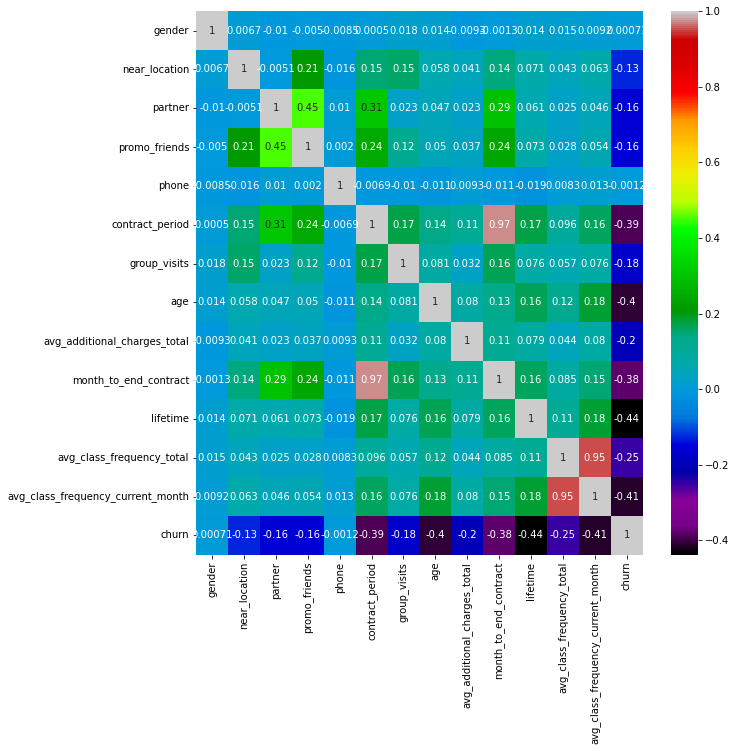

In [13]:
data_corr = data.corr() # создадим матрицу корреляции
plt.figure(figsize=(10,10))
sns.heatmap(data=data_corr, annot=True, cmap='nipy_spectral'); # построим тепловую карту

Проанализировав график видим, что целевая переменная `'churn'` больше всего коррелирует с:
* `'lifetime'` (-0.44), 
* `'avg_class_frequency_current_month'` (-0.41), 
* `'age'` (0.4), 
* `'contract_period'` (-0.39)
* `'month_to_end_contract'` (-0.38).

Особенно выделяются две пары кризнаков с высокой корреляцией: 
* `'contract_period'` и `'month_to_end_contract'` (0.97)
* `'avg_class_frequency_total'` и `'avg_class_frequency_current_month'` (0.95)

#### Предварительный вывод

Характерные черты постоянного клиента:
* Купил контракт более чем на месяц,
* Пользуется дополнительными услугами,
* Посещает занятия 2 раза в неделю и более,
* Является сотрудником компании-партнёра клуба,
* Использовал промокод акции «приведи друга»,
* Посещает групповые занятия.

<a id="building"></a>

## Шаг 3. Построим модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

In [14]:
# разделим данные на признаки и целевую переменную
X = data.drop('churn', axis=1)
y = data['churn']

# разобъём данные на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Обучим модель логистической регрессией - LogisticRegression.

In [15]:
model_log = LogisticRegression(solver='liblinear') # задаём алгоритм логистической регрессии
model_log.fit(X_train, y_train) # обучим модель 

predictions_log = model_log.predict(X_test) # сделаем прогноз
probabilities = model_log.predict_proba(X_test)[:,1] # оценка вероятности, что churn=1

Посчитаем метрики

In [16]:
acc_log = accuracy_score(y_test, predictions_log) # accuracy (долю правильных ответов)
precision_log = precision_score(y_test, predictions_log) # precision (очность ответов)
recall_log = recall_score(y_test, predictions_log) # recall (полнота)

Обучим модель случайным лесом -  RandomForestClassifier.

In [17]:
# зададим алгоритм и обучим модель
rf_model = RandomForestClassifier(n_estimators = 50, random_state = 0)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)# сделаем прогнозы
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

Посчитаем метрики

In [18]:
rf_acc = accuracy_score(y_test, rf_predictions) # accuracy (долю правильных ответов)
rf_precision = precision_score(y_test,rf_predictions) # precision (очность ответов)
rf_recall = recall_score(y_test, rf_predictions) # recall (полнота)

Выведим на экран.

In [19]:
display('Метрики для моделей:  LogisticRegression   RandomForestClassifier')           
display('Accuracy:              {:.2f}                  {:.2f}'.format(acc_log, rf_acc))
display('Precision:             {:.2f}                  {:.2f}'.format(precision_log, rf_precision))
display('Recall:                {:.2f}                  {:.2f}'.format(recall_log, rf_recall))

'Метрики для моделей:  LogisticRegression   RandomForestClassifier'

'Accuracy:              0.93                  0.92'

'Precision:             0.86                  0.84'

'Recall:                0.83                  0.82'

**Предварительные выводы**

Сравнивая метрики мы видим, что оба алгоритма показали высокую длю (выше 90%) правильных ответов. 
Алгоритм линейной регресии LogisticRegression показал себя чуть лучше. Все метрики выше на 1-2 сотых.

<a id="clustering"></a>

## Шаг 4. Сделаем кластеризацию клиентов

#### Стандартизируем данные и построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков.  Нарисуем дендрограмму.

In [20]:
# стандартизируем данные
scaler = StandardScaler()
X_sс = scaler.fit_transform(X) 

linked = linkage(X_sс, method = 'ward') # создаём матрицу расстояний

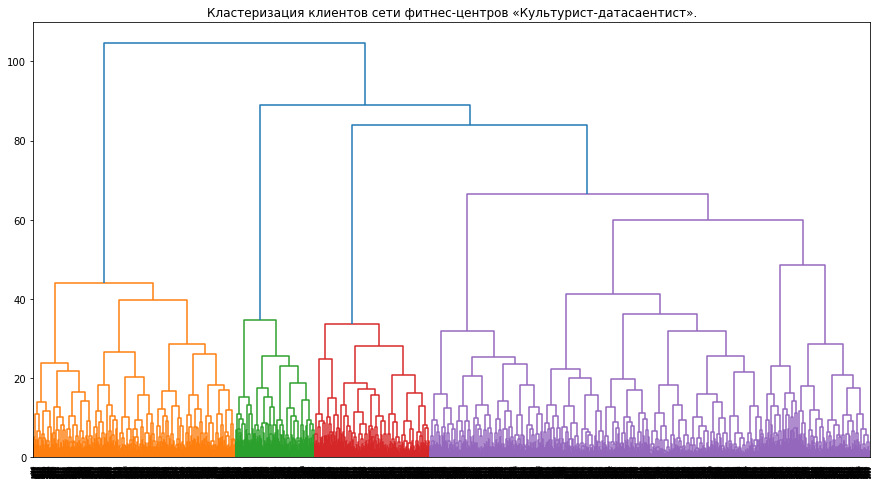

In [21]:
# нарисуем дендрограмму
plt.figure(figsize=(15, 8))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов сети фитнес-центров «Культурист-датасаентист».')
plt.show();

На данное графике мы видим, что оптимально будет выделить 4 кластера.

#### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

In [22]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров = 5
labels = km.fit_predict(X_sс) # прогнозируем кластеры
data['cluster_km'] = labels # дабавим в df метки кластеров

Сгруппируем по кластерам и посмотрим на средние значения признаков

In [23]:
data.groupby(by='cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


Кластер 0

минимальный отток - 2.8 %
проживание или работа в районе, где находится фитнес-центр - 95.9 %
сотрудник компании-партнёра клуба - 78.3 %
пришли в рамках акции "приведи друга" - 57.4 %
длительность текущего действующего абонемента - 10.0 месяца
факт посещения групповых занятий - 54.3 % 
lifetime - 4.7 месяца


Кластер 1

отток - 26.7 %
проживание или работа в районе, где находится фитнес-центр - 86.2 %
сотрудник компании-партнёра клуба - 47.0 %
пришли в рамках акции "приведи друга" - 30.6 %
длительность текущего действующего абонемента - 4.5 месяца
факт посещения групповых занятий - 42.6%
lifetime - 3.9 месяца


Кластер 2

отток - 44.4 %
проживание или работа в районе, где находится фитнес-центр - 0 %
сотрудник компании-партнёра клуба - 46.3 %
пришли в рамках акции "приведи друга" - 7.9 %
длительность текущего действующего абонемента - 2.2 месяца
факт посещения групповых занятий - 21.6 %
lifetime - 2.8 месяца


Кластер 3

отток - 51.4 %
проживание или работа в районе, где находится фитнес-центр - 100 % 
сотрудник компании-партнёра клуба - 35.0 %
пришли в рамках акции "приведи друга" - 24.0 %
длительность текущего действующего абонемента - 1.9 месяца
факт посещения групповых занятий - 34.2 %
lifetime - 2.4 месяца


Кластер 4

отток - 6.8 %
проживание или работа в районе, где находится фитнес-центр - 97.6 %
сотрудник компании-партнёра клуба - 35.7 %
пришли в рамках акции "приведи друга" - 23.0 %
длительность текущего действующего абонемента - 2.5 месяца
факт посещения групповых занятий - 47.4 %
lifetime - 4.9 месяца


Кластеры с минимальным оттоком  - 0 и 4. 
Кластеры с максимальным оттоком - 3 и 2.

#### Построим распределения признаков для кластеров.

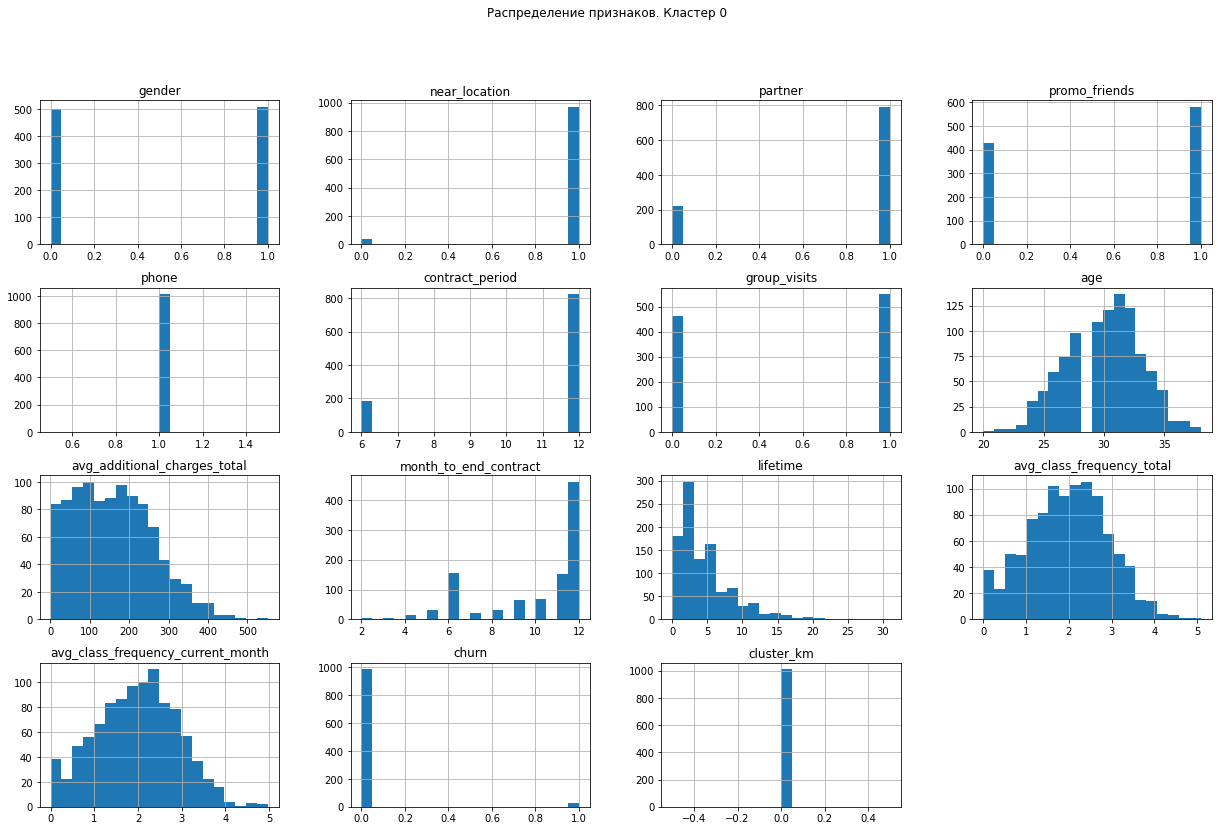

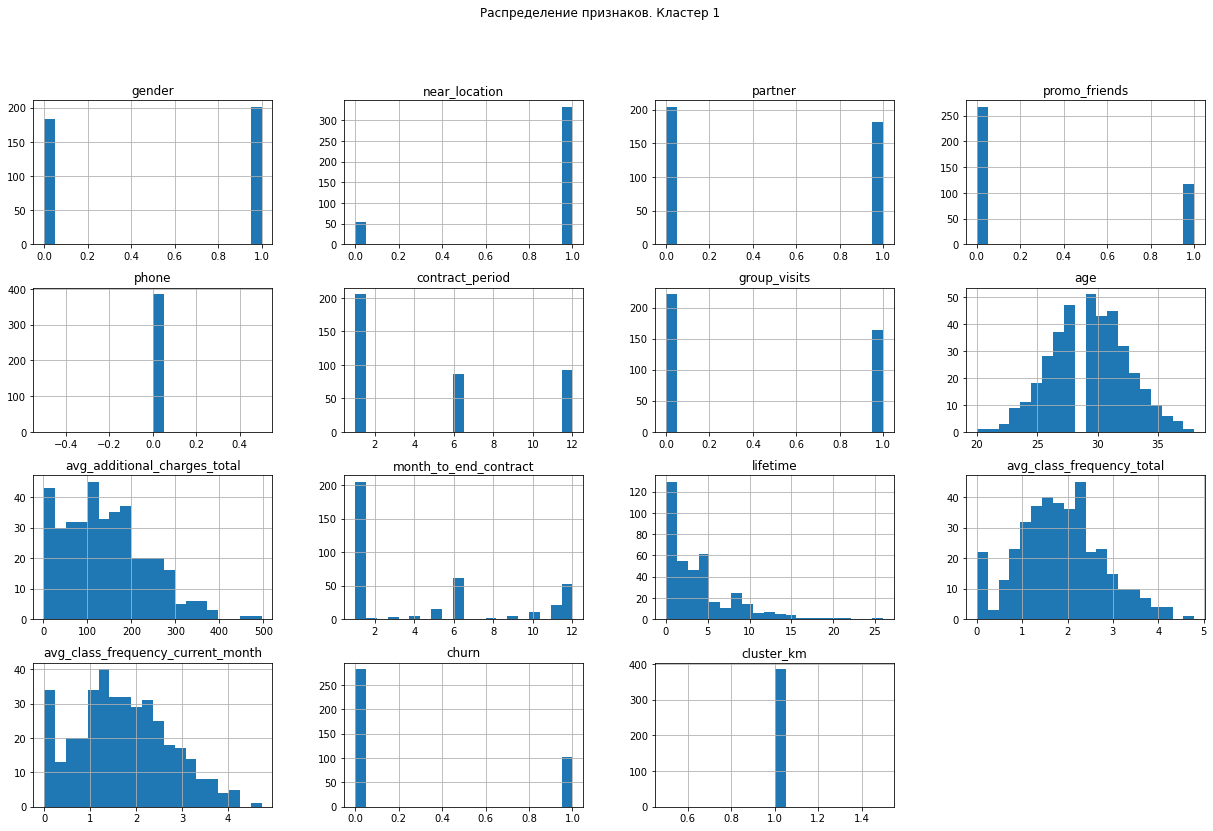

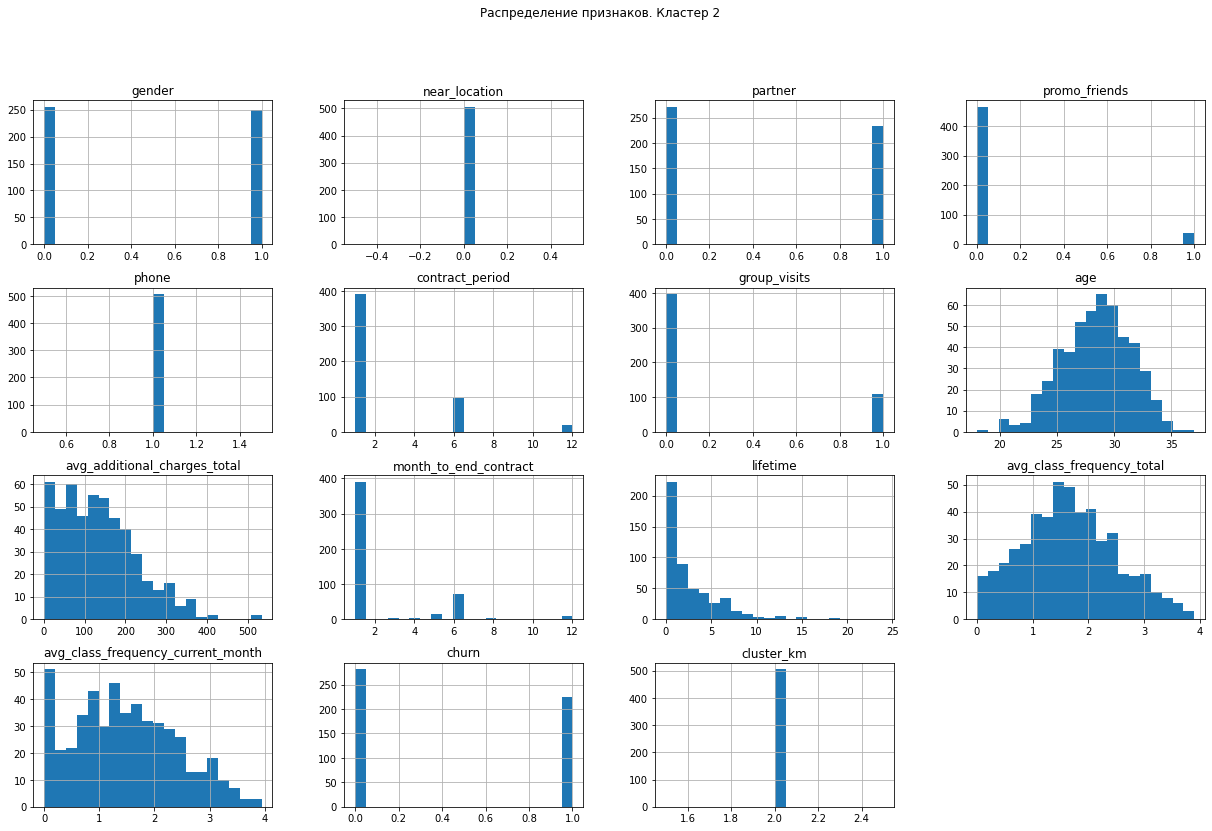

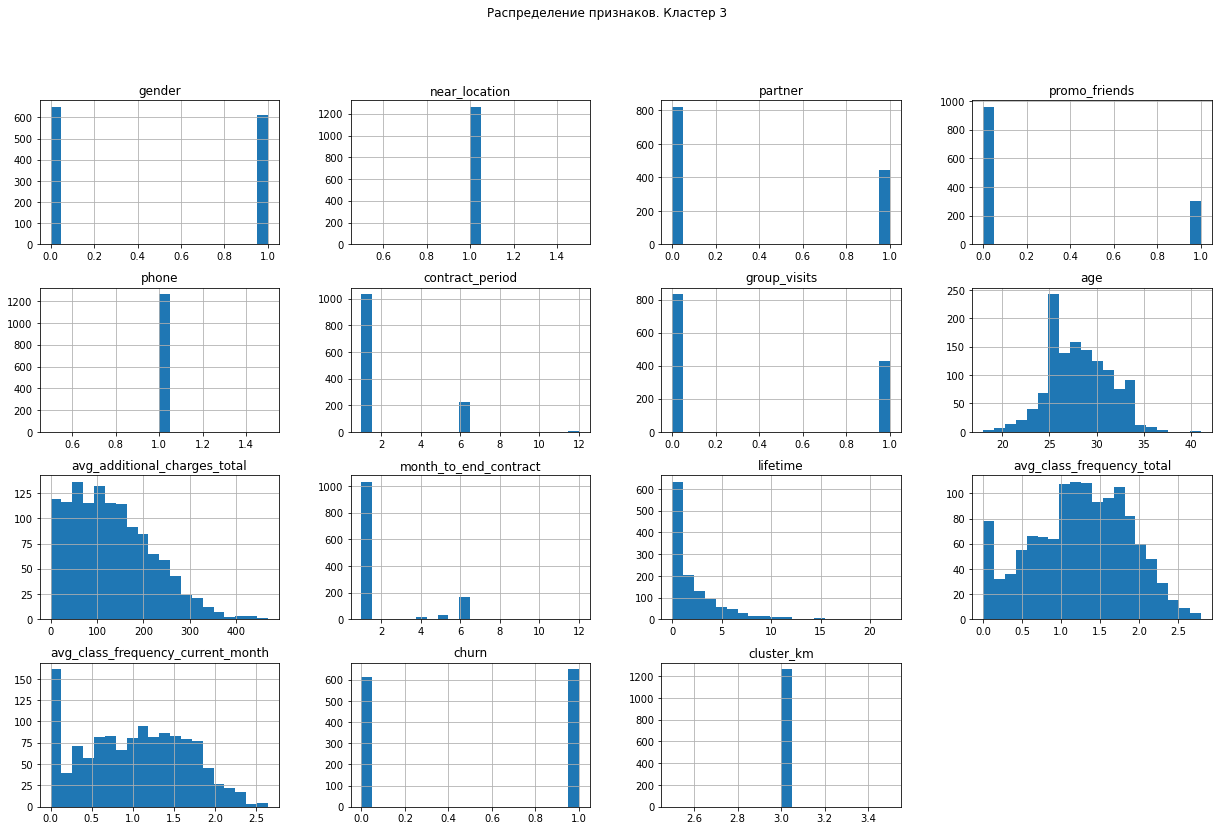

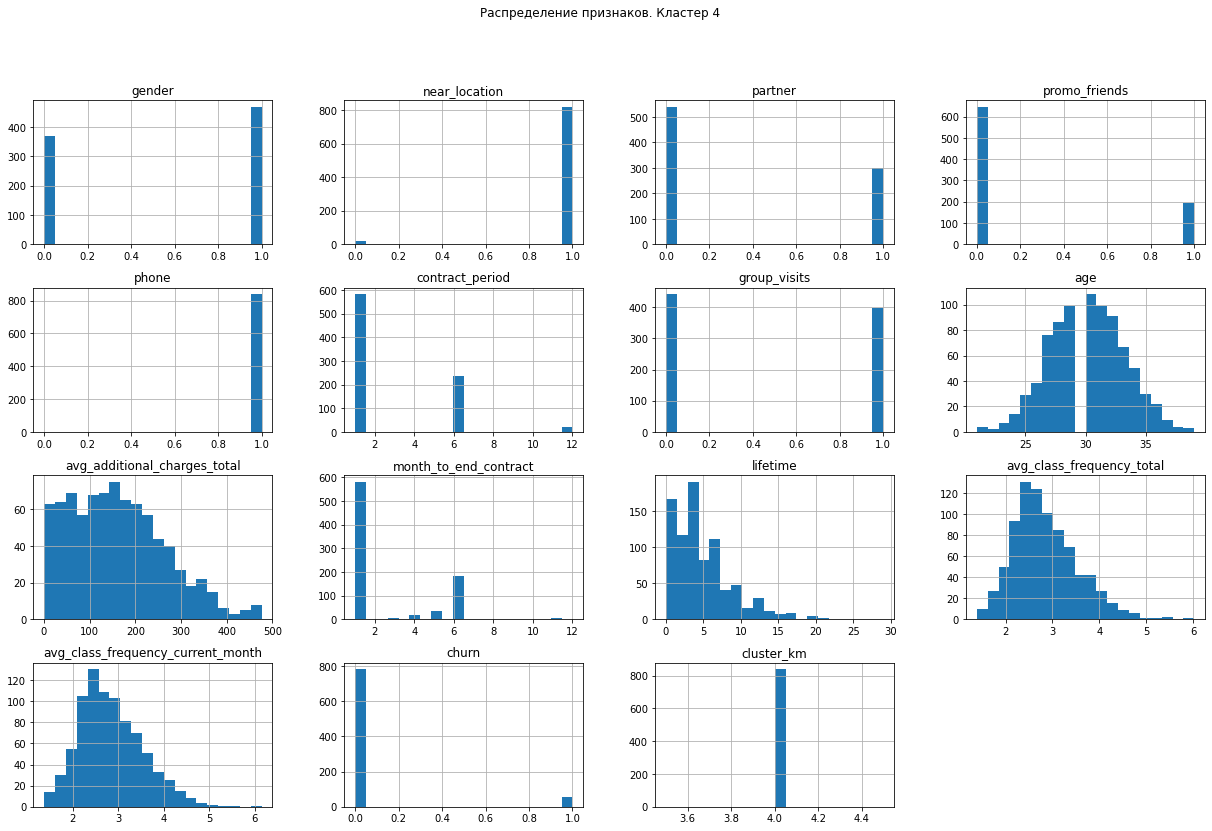

In [24]:
for values in data['cluster_km'].sort_values().unique():
    (data.loc[lambda data: data['cluster_km'] == values]).hist(figsize=(21,13), bins=20)
    plt.suptitle('Распределение признаков. Кластер {}'.format(values))
    plt.show();

**Предварительные выводы**

Самый высокий процент оттока среди клиентов попавших в кластер 3 (51.4 %) и 2 (44.4 %). 

Анализируя эти две группы приходим к выводу, что:
* проживание или работа в районе, где находится фитнес-центр не является сдерживающим фактором для оттока,
* к сдерживающим факторам является факт первоначальной записи в рамках акции «приведи друга», наличие абонемента на 6 или 12 месяцев и посещение групповых занятий.
* по графикам 'Avg_class_frequency_total'и 'Avg_class_frequency_current_month' видно, что многие клиенты за месяц до оттока переставали ходить в зал. 

<a id="conclusion"></a>

## Шаг5. Выводы

В ходе работы мы загрузили данные. Проверили на нулевые значения, пропуски и дубликаты. Перевели название столбцов в нижний регистр. Провели статестический анализ. 
Данные содержат 4000 строк и 14 столбцов. Средний возраст клиентов 29,2 года, от 18 до 41 года, с распределением по гендорному призныку почти 50/50. Большая часть - 84,5% клиентов проживание или работа в районе, где находится фитнес-центр, 48,7% являются сотрудником компании-партнёра клуба, 30,9% участники акции «приведи друга», 41,2% посещеют групповые занятия. Средняя длительность текущего действующего абонемента 4,68 месяца, медиана - 1 месяц.

Провели исследовательский анализ. Посмотрели на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался. 
Средние значения для клиентов попавших в отток:
* lifetime 1 месяц
* contract_period 1.7 месяца
* month_to_end_contract 1.6 месяца
* age 27 лет

Средние значения для оставшегося клиента:
* lifetime 5 месяцев
* contract_period 5.7 месяца
* month_to_end_contract 5.2 месяца
* age 30 лет.

Построили столбчатые гистограммы и распределения Из данных графиков мы видим:
* Клиенты с контрактом в 6 месяцев уходят редко, а с контрактом в 12 месяцев еще реже.
* Клиенты из оттока моложе оставщихся.
* Оставшиеся клиенты чаще пользуются другими услугами.
* Чаще уходят имея 1 месяц до окончания текущего действующего абонемента и значительно реже имея 6 месяцев.
* Уходят обычно на 1 или 2 месяце занятий.
* Средняя частота посещений у оставшихся клиентов выше.
* Гендерные различия не влияют на отток.
* Среди ушедших клиентов доля сотрудников компании-партнёра клуба меньше, как и тех кто пришел по акции «приведи друга».
* Наличие контактного телефона не влияет на удержание клиента.
* Ушедшие клиенты мало посещали групповые занятия.признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток). Из данных графиков мы видим:
* Клиенты с контрактом в 6 месяцев уходят редко, а с контрактом в 12 месяцев еще реже.
* Клиенты из оттока моложе оставщихся.
* Оставшиеся клиенты чаще пользуются другими услугами.
* Чаще уходят имея 1 месяц до окончания текущего действующего абонемента и значительно реже имея 6 месяцев.
* Уходят обычно на 1 или 2 месяце занятий.
* Средняя частота посещений у оставшихся клиентов выше.
* Гендерные различия не влияют на отток.
* Среди ушедших клиентов доля сотрудников компании-партнёра клуба меньше, как и тех кто пришел по акции «приведи друга».
* Наличие контактного телефона не влияет на удержание клиента.
* Ушедшие клиенты мало посещали групповые занятия.

Построили матрицу корреляций и отобразили её.
Пришли к выводу, что характерными чертами постоянного клиента являются:
* Купил контракт более чем на 6 или 12 месяцев,
* Пользуется дополнительными услугами,
* Посещает занятия 2 раза в неделю и более,
* Является сотрудником компании-партнёра клуба,
* Использовал промокод акции «приведи друга»,
* Посещает групповые занятия.

Построили модель прогнозирования оттока клиентов.
Обучили модель двумя алгоритмами логистической регрессией (LogisticRegression) и случайным лесом (RandomForestClassifier).
Сделали вывод, что оба алгоритма показали высокую длю (выше 90%) правильных ответов. Алгоритм линейной регресии LogisticRegression показал себя чуть лучше. Все метрики выше на 1-2 сотых.

Сделали кластеризацию клиентов. Стандартизировали данные и построили матрицу расстояний функцией linkage() на стандартизованной матрице признаков. Нарисовали дендрограмму. 
Вывод: оптимально будет выделить 4 кластера.

Обучили модель кластеризации на основании алгоритма K-Means и спрогнозировали кластеры клиентов. Количество кластеров задали равным 5 (требование задания).
Построили распределения признаков для кластеров.
Пришли к выводу: Самый высокий процент оттока среди клиентов попавших в кластер 3 (51.4 %) и 2 (44.4 %). 

Анализируя эти две группы пришли к выводу, что:
* проживание или работа в районе, где находится фитнес-центр не является сдерживающим фактором для оттока,
* к сдерживающим факторам является факт первоначальной записи в рамках акции «приведи друга», наличие абонемента на 6 или 12 месяцев и посещение групповых занятий.
* по графикам 'Avg_class_frequency_total'и 'Avg_class_frequency_current_month' видно, что многие клиенты за месяц до оттока переставали ходить в зал.

<a id="recommendation"></a>

## Базовые рекомендации по работе с клиентами

* Необходимо развивать программу по привлечению сотрудников компании-партнёра клуба,
* Развивать акцию «приведи друга». Сделать ее на постоянной основе и расширить охват.
* Сделать скидки на первые занятия в группах.
* Продавать абонименты не только на 6 и 12 месяцев, а и на 3 и на 9 месяцев.
* Подталкивать клиентов пользоваться дополнительными услугами (акции, скидки, розыгрыши).
* Обращать внимание на отсутствие клиента более месяца. Звонить, интересоваться, рассказывать об акциях и т.п.